<h2>OpenCV Tutorial notes</h2>

Documentation: https://docs.opencv.org/4.6.0/index.html

Much of the code below is adapted from https://docs.opencv.org/4.6.0/d6/d00/tutorial_py_root.html. A more expansive description of the various methods and parameters can be found there. Comments in quotations are from there, unless noted otherwise.

To install the OpenCV package for python, use 

    pip install opencv-python
    
If you're using Anaconda Navigator, do this from a command (or PowerShell) prompt launched from there. 

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
# rescales using cubic interpolation and a bilateral filter with a large block size
# output is square for now
def rescale(image, size):
    return cv.bilateralFilter(cv.resize(image, (size,size), interpolation=cv.INTER_CUBIC), 9, 75,75)

# empty callable, ignore this
def nothing(x):
    pass

Set <i>filename</i> to the relative path to an image file. Supported formats include bitmaps, jpeg, png, webp, tiff, and others.

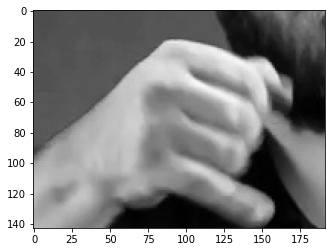

In [139]:
filename = "temp/0010.jpg"

if cv.haveImageReader(filename):
    img = cv.imread(filename, flags = 0)
    plt.imshow(img, 'gray')
else:
    print("Could not find file.")
    
# A given image can be converted to greyscale (or among a number of colour representations) by cv.cvtColor().
# gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

<i>img</i> is a numpy.ndarray of pixel greyscale values. Black is 0, white is 255.

<h3>Thresholding methods</h3>

Thresholding functions apply various floors or ceilings to pixel greyscale values.

The BINARY threshold modes return images where every pixel is changed to one of two values. Some methods require a binary image as input. Computing a convolutional kernel can be faster for an image where small pixel values are suppressed to zero. The variable <i>maxval</i> has no effect for the other modes.

The OTSU modes use a method to compute an "optimal" threshold. The variable <i>threshold</i> has no effect for these modes. There's one more such mode, cv.THRESH_TRIANGLE.

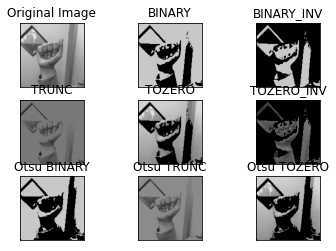

In [188]:
## Thresholding examples

threshold = 120
maxval = 200

imageCount = 9
images = [0]*imageCount
images[0] = img
ret,images[1] = cv.threshold(img,threshold,maxval,cv.THRESH_BINARY)
ret,images[2] = cv.threshold(img,threshold,maxval,cv.THRESH_BINARY_INV)
ret,images[3] = cv.threshold(img,threshold,maxval,cv.THRESH_TRUNC)
ret,images[4] = cv.threshold(img,threshold,maxval,cv.THRESH_TOZERO)
ret,images[5] = cv.threshold(img,threshold,maxval,cv.THRESH_TOZERO_INV)
ret,images[6] = cv.threshold(img,0,maxval,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret,images[7] = cv.threshold(img,0,maxval,cv.THRESH_TRUNC+cv.THRESH_OTSU)
ret,images[8] = cv.threshold(img,0,maxval,cv.THRESH_TOZERO+cv.THRESH_OTSU)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV', 'Otsu BINARY', 'Otsu TRUNC', 'Otsu TOZERO']
for index, image in enumerate(images):
    plt.subplot(3,3,index+1),plt.imshow(image,'gray',vmin=0,vmax=255)
    plt.title(titles[index])
    plt.xticks([]),plt.yticks([])
plt.show()

Adaptive thresholding methods apply a variable threshold to each pixel which depends on nearby pixels. The neighbourhood of pixels polled is determined by <i>blockSize</i>. The threshold at a pixel is then the neighbourhood average with a constant <i>shift</i> subtracted. The returned image is always binary.

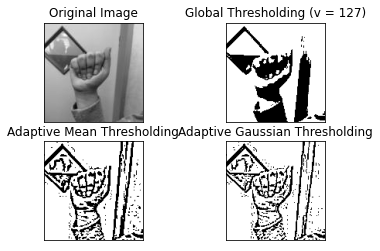

In [213]:
# Adaptive thresholding examples

blockSize = 7      # must be odd
shift = 3

parity = cv.THRESH_BINARY
#parity = cv.THRESH_BINARY_INV

threshold = 120
maxval = 200

ret,th1 = cv.threshold(img,threshold,maxval,parity)
th2 = cv.adaptiveThreshold(img,maxval,cv.ADAPTIVE_THRESH_MEAN_C,parity,blockSize,shift)
th3 = cv.adaptiveThreshold(img,maxval,cv.ADAPTIVE_THRESH_GAUSSIAN_C,parity,blockSize,shift)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<h2>Feature detection methods</h2>

In the following examples, adjust the newSize trackbar to resize the window. If <i>usingGaussianRescaling</i> is True, the image will be up- or down-scaled to the same size. The minimum window width is about 500, so if you're using an image smaller than that it'll initially be distorted. 

Press ESC to end the loop and remove the window.

If an error is raised while a window is being displayed, it will become non-responsive. Use cv.destroyAllWindows() to remove it in that case.

Note that most of the methods below are not size-invariant.

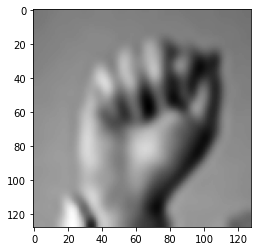

In [166]:
plt.imshow(rescale(img, 128), 'gray')
plt.show()

In [ ]:
cv.destroyAllWindows()

<h3>Canny edge detection</h3>

Returns a binary image with edges in white. Applies a Gaussian blur, then suppresses non-locally-max values, then applies a gradient threshold to determine edges. Pixels with gradient above <i>maxVal</i> are always classed as edges, and pixels with gradient below <i>minVal</i> are always classed as non-edges. Pixels in between are classed as edges if they connect to an edge.

127 30 100


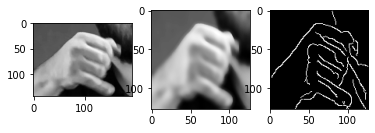

In [9]:
# Canny's edge detection
window = "Canny Edge Detection"
cv.namedWindow(window, cv.WINDOW_NORMAL)

cv.createTrackbar("newSize", window, img.shape[0], 1024, nothing)
cv.createTrackbar("minVal", window, 0, 255, nothing)
cv.createTrackbar("maxVal", window, 255, 255, nothing)
cv.createTrackbar("Off/On", window, 1, 1, nothing)

while True:
    newSize = cv.getTrackbarPos("newSize", window)
    minVal = cv.getTrackbarPos("minVal", window)
    maxVal = cv.getTrackbarPos("maxVal", window)
    switch = cv.getTrackbarPos("Off/On", window)
    cv.resizeWindow(window, newSize, newSize)
        
    resize = rescale(img, newSize)
    if switch:
        edges = cv.Canny(resize, minVal, maxVal)
        cv.imshow(window, edges)
    else:
        cv.imshow(window, resize)
    k = cv.waitKey(1) & 0xFF
    if k == 27:        
        break     

cv.destroyWindow(window)

print(newSize, minVal, maxVal)
plt.subplot(1,3,1), plt.imshow(img,'gray')
plt.subplot(1,3,2), plt.imshow(resize,'gray')
plt.subplot(1,3,3), plt.imshow(edges, 'gray')
plt.show()

    

<h3>Harris corner and edge detection</h3>

Harris detection classes "corners" as where the gradient (computed by a Sobel operator, of size <i>kernelSize</i>) is large, "edges" as where the gradient is small in one direction and large in another, and "flat" as where the gradient is small. To determine what "large" and "small" are it uses a curvature scoring function (with one free <i>parameter</i>) computed from the eigenvalues of the Hessian matrix (again of Sobel operators) at the pixel, and compares to other pixels within a distance <i>blockSize</i>.

Unlike cv.Canny, which returns a black-and-white binary image, cv.Harris returns an image whose pixels have type fp32 and values between 0 and 1.

In [7]:
cv.destroyAllWindows()

3 11 0.011764705882352941


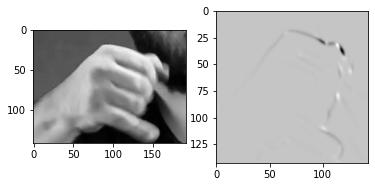

In [32]:
# Harris's corner and edge detection

window = "Harris Corner/Edge Detection"
cv.namedWindow(window, cv.WINDOW_NORMAL)
cv.createTrackbar("newSize", window, img.shape[0], 1024, nothing)
cv.createTrackbar("blockSize", window, 2, 7, nothing)
cv.createTrackbar("kernelSize", window, 4, 7, nothing)
cv.createTrackbar("parameter", window, 16, 255, nothing)

while True:  
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
    newSize = cv.getTrackbarPos("newSize", window)
    blockSize = int(cv.getTrackbarPos("blockSize", window))
    kernelSize = 2*int(cv.getTrackbarPos("kernelSize", window))+1
    parameter = cv.getTrackbarPos("parameter", window) / 255

    harris = cv.cornerHarris(rescale(img, newSize), blockSize, kernelSize, parameter)
    cv.resizeWindow(window, newSize, newSize)
    cv.imshow(window, harris)
        
cv.destroyWindow(window)

print(blockSize, kernelSize, parameter)
plt.subplot(1,2,1), plt.imshow(img, 'gray')
plt.subplot(1,2,2), plt.imshow(harris, 'gray')
plt.show()


<h3>Shi-Tomasi corner detection</h3>

Shi-Tomasi uses the same procedure as Harris but with a different scoring function. The code below shows them marked on the image.

The method returns a list of corners detected, no longer than <i>maxCorners</i>. The corners are ranked by quality, and the list is truncated at <i>qualityLevel</i> percent of the maximum corner quality. A corner is suppressed if a higher quality corner is present within <i>minDistance</i>.

68 0.02 29


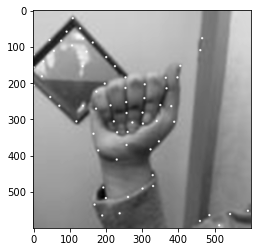

In [195]:
# Shi-Tomasi corner detection

window = "Corner Detection via Shi-Tomasi"
cv.namedWindow(window, cv.WINDOW_NORMAL)
cv.createTrackbar("newSize", window, img.shape[0], 1024, nothing)
cv.createTrackbar("maxCorners", window, 25, 100, nothing)
cv.createTrackbar("qualityLevel", window, 1, 100, nothing)
cv.createTrackbar("minDistance", window, 3, 128, nothing)

while True:
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
    maxCorners = cv.getTrackbarPos("maxCorners", window)
    qualityLevel = (cv.getTrackbarPos("qualityLevel", window)+1) / 100
    minDistance = cv.getTrackbarPos("minDistance", window)
    newSize = cv.getTrackbarPos("newSize", window)
    
    img_marked = rescale(img, newSize)
    corners = cv.goodFeaturesToTrack(img_marked,maxCorners,qualityLevel,minDistance)
    corners = np.int0(corners)   
    for i in corners:
        x,y = i.ravel()
        cv.circle(img_marked,(x,y),3,255,-1) 
    
    cv.resizeWindow(window, newSize, newSize)
    cv.imshow(window, img_marked)

cv.destroyWindow(window)
    
print(maxCorners, qualityLevel, minDistance)
plt.imshow(img_marked, 'gray')    

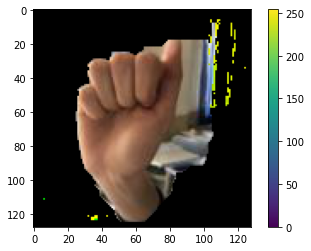

In [299]:
# GrabCut (interactive) foreground-extraction (without interactivity)

mask = np.zeros(newimg.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (5,5,120,120)
mask, bgdModel, fgdModel = cv.grabCut(newimg,mask,rect,bgdModel,fgdModel,5, mode= cv.GC_INIT_WITH_RECT)


mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg2 = newimg*mask[:,:,np.newaxis]
plt.imshow(newimg2)
plt.colorbar()
plt.show()

<h3>Keypoint detectors</h3>

There are quite a few of these keypoint-detection methods: see https://docs.opencv.org/4.6.0/d5/d51/group__features2d__main.html, or https://docs.opencv.org/4.6.0/d0/d13/classcv_1_1Feature2D.html. They're represented by objects which do calculations with images given to them. The basic methods are <i>.detect</i>, which locates keypoints, and <i>.compute</i>, which creates feature-description vectors at each keypoint. The method <i>.detectAndCompute</i> returns the pair of lists of keypoints and descriptors.

<h3>SIFT and SURF keypoint detection</h3>

SIFT, Scale-invariant Feature Transform, uses a series of steps involving comparing image data at various Gaussian re-scales to identify a set of keypoints (corners). An orientation is given to each keypoint depending on the gradient there. SURF, Speeded-Up Robust Features, follows the same procedure but with some numerical relaxations that decrease the compute time. A variation, U-SURF, does not compute the orientation. "Analysis shows SURF is 3 times faster than SIFT while performance is comparable to SIFT. SURF is good at handling images with blurring and rotation, but not good at handling viewpoint change and illumination change," writes the author of the OpenCV documentation. A more practical concern is that SURF is still under patent.

See Lowe, "Distinctive Image Features from Scale-Invariant Keypoints" (2004) or https://docs.opencv.org/4.6.0/da/df5/tutorial_py_sift_intro.html (SIFT) and Bay, Tuytelaars, and Van Gool, "SURF: Speeded Up Robust Features" (2006) or https://docs.opencv.org/4.6.0/df/dd2/tutorial_py_surf_intro.html (SURF) for details.

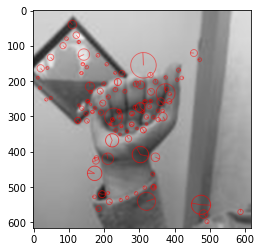

In [210]:
sift = cv.SIFT_create()

window = "SIFT Keypoint Detection"
cv.namedWindow(window, cv.WINDOW_NORMAL)
cv.createTrackbar("newSize", window, img.shape[0], 1024, nothing)

while True:
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    newSize = cv.getTrackbarPos("newSize", window)
    cv.resizeWindow(window, newSize, newSize)
    resize = rescale(img, newSize)
    
    kp = sift.detect(resize,None)
    resize = cv.drawKeypoints(resize,kp,None, color=(255,0,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv.imshow(window, resize)
    
cv.destroyWindow(window)
plt.imshow(resize, 'gray')

<h3>FAST keypoint detection</h3>

FAST, Features from Accelerated Segment Test, examines a neighbourhood of each pixel to detect paths of low or high intensity, using a machine-learned procedure. "All the above feature detection methods are good in some way. But they are not fast enough to work in real-time applications like SLAM.... It is several times faster than other existing corner detectors. But it is not robust to high levels of noise. It is dependent on a threshold."

504 7 2


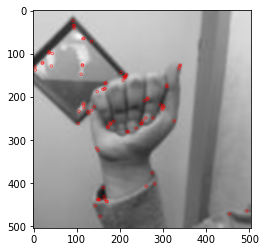

In [208]:
fast = cv.FastFeatureDetector_create()

window = "FAST Keypoint Detection"
cv.namedWindow(window, cv.WINDOW_NORMAL)
cv.createTrackbar("newSize", window, img.shape[0], 1024, nothing)
cv.createTrackbar("threshold", window, fast.getThreshold(), 64, nothing)
cv.createTrackbar("mode", window, fast.getType(),2, nothing)

while True:
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    newSize = cv.getTrackbarPos("newSize", window)
    thresh = cv.getTrackbarPos("threshold", window)
    mode = cv.getTrackbarPos("mode", window)
    
    resize = rescale(img, newSize)
    fast.setThreshold(thresh)
    fast.setType(mode)
    
    kp = fast.detect(resize,None)
    cv.resizeWindow(window, newSize, newSize)
    cv.imshow(window, cv.drawKeypoints(resize,kp,None, color=(255,0,0)))
    
cv.destroyWindow(window)
print(newSize, thresh, mode)
plt.imshow(cv.drawKeypoints(resize,kp,None, color=(255,0,0)), 'gray')
plt.show()

 The code below will do batch processing.

In [162]:
newSize = 128
inDirName = '0/'
outDirName = 'temp/'

if !Path(outDirName).exists():
    Path(outDirName).mkdir()

e1 = cv.getTickCount()      #cv counts processor cycles, could use python time module instead
filelist = [x for x in Path(inDirName).iterdir()]
for filepath in filelist:
    img_temp = rescale(cv.imread(str(filepath), flags=0), newSize)
    kp = sift.detect(img_temp, None)
    img_temp = cv.drawKeypoints(img_temp,kp,None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    writePath = outDirName + filepath.name
    if !cv.haveImageWriter(writePath):
        print("Error: could not write to " + writePath + ".")
    else:
        cv.imwrite(writePath, img_temp)

e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

Some of the keypoint detectors use a lot of memory in their feature-description vectors. BRIEF is an alternate feature-description routine, giving a binary vector of intensity comparisons (of default length 32 bytes). It can be called with any keypoint set. "BRIEF is a faster method feature descriptor calculation and matching. It also provides high recognition rate unless there is large in-plane rotation."

In [216]:
# STAR is a suggested feature-detector routine to go with BRIEF
star = cv.xfeatures2d.StarDetector_create()
# but for my test image with default settings it didn't give anything, so for now it's FAST
kp = fast.detect(img,None)

brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

32
(180, 32)


In [217]:
des

array([[ 91, 215,  49, ...,  17, 225, 200],
       [145,  41,  14, ...,  84, 203, 103],
       [161,  13,  14, ..., 124, 202, 103],
       ...,
       [119,  55, 185, ...,  95, 141,  56],
       [206, 111, 153, ..., 197,  95,  42],
       [ 72, 136,  70, ..., 104, 227,  71]], dtype=uint8)

ORB, "oriented brief," an unpatented alternative to SIFT/SURF. "The algorithm uses FAST in pyramids to detect stable keypoints, selects the strongest features using FAST or Harris response, finds their orientation using first-order moments and computes the descriptors using BRIEF (where the coordinates of random point pairs (or k-tuples) are rotated according to the measured orientation)." See https://docs.opencv.org/4.6.0/d1/d89/tutorial_py_orb.html.

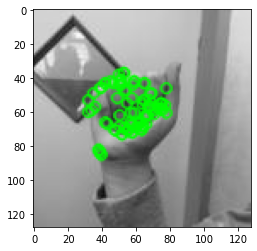

(<matplotlib.image.AxesImage at 0x22bd437ae20>, None)

In [221]:
# Initiate ORB detector
orb = cv.ORB_create()
orb.setMaxFeatures(150)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

<h3>Matching keypoints between images</h3>

Given a query image (what's being searched for) and a train image (what's being searched), have your favourite kp-detector <i>.detectAndCompute</i> a list of keypoints and a list of descriptors for each. A matcher looks to make matches between keypoints on the two lists by minimising the distance between their feature vectors. For floating point vectors, like SIFT or FAST give, there is cv.NORM_L2 (the default) or cv.NORM_L1. For binary vectors, like ORB gives, there is cv.NORM_HAMMING. (Except "if ORB is using WTA_K == 3 or 4, cv.NORM_HAMMING2 should be used.")

BFMatcher does this by brute force, finding for each keypoint of the query image the best-fitting keypoint of the train image. Setting <i>crossCheck = True</i> at creation requires returned matches also to be optimal for the given train keypoint with respect to the query keypoints.

To inspect the result, cv.drawMatches illustrates the correspondences made.

See https://docs.opencv.org/4.6.0/dc/dc3/tutorial_py_matcher.html.

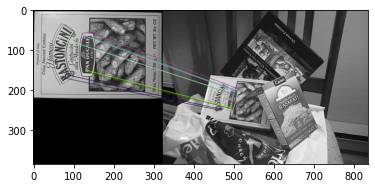

(<matplotlib.image.AxesImage at 0x22bd45d6640>, None)

In [235]:
img1 = cv.imread('samples/box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('samples/box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object; Hamming distance b/c ORB uses binary feature vec
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

# DMatch has four attributes:
# DMatch.distance - Distance between descriptors. The lower, the better it is.
# DMatch.queryIdx - Index of the descriptor in query descriptors des1
# DMatch.trainIdx - Index of the descriptor in train descriptors des2
# DMatch.imgIdx - Index of the train image.

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

A variation computes a list of the <i>k</i> best matches rather than just one. The "ratio test" referred below is a suggestion of Lowe: a match <i>m</i> is retained if its fit <i>m.distance</i> is sufficiently superior to that of the second-best match. cv.drawMatchesKnn visualises the result.

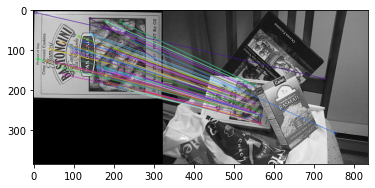

(<matplotlib.image.AxesImage at 0x22bd2c21eb0>, None)

In [242]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

FLANN, Fast Library for Approximate Nearest Neighbors, "contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features." It can use both <i>k</i>-d tree and LSH.

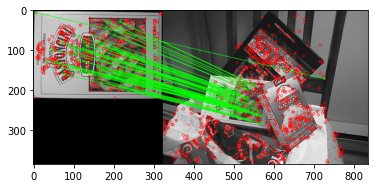

(<matplotlib.image.AxesImage at 0x22bc5143790>, None)

In [243]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

# Alternatively:
#FLANN_INDEX_LSH = 6
#index_params= dict(algorithm = FLANN_INDEX_LSH,
#                   table_number = 6, # 12
#                   key_size = 12,     # 20
#                   multi_probe_level = 1) #2

search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
good = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        good.append(m)          #we'll use this later
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

cv.findHomography looks for a perspective transformation embedding keypoints in the query image at their matches in the train image (approximately). See https://docs.opencv.org/4.6.0/d1/de0/tutorial_py_feature_homography.html. From above, our chosen matches are stored here in the list <i>good</i>.

In [244]:
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    # cv.LEAST_MEDIAN gives an alternative routine to RANSAC.
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

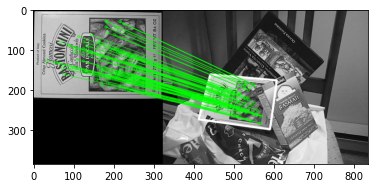

(<matplotlib.image.AxesImage at 0x22bb58941c0>, None)

In [245]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

<h2>Machine Learning in OpenCV</h2>

Methods implemented include k-nearest neighbours, SVM, and k-means. See https://docs.opencv.org/4.6.0/d6/de2/tutorial_py_table_of_contents_ml.html.

<h3>kNN for OCR</h3>

We first classify handwritten digit samples by finding their most-alike images in the labelled set. See https://docs.opencv.org/4.6.0/d8/d4b/tutorial_py_knn_opencv.html. The examples below use <i>k</i> = 5 and leave as an exercise to choose <i>k</i> to maximise accuracy on the given test set.

In [246]:
img = cv.imread('samples/digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()

knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

91.76


In [247]:
# numpy can save the training data...
np.savez('temp/knn_data.npz',train=train, train_labels=train_labels)
# ...and later load it
with np.load('temp/knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']

['train', 'train_labels']


"Since we are using intensity values (uint8 data) as features, it would [use less space] to convert the data to np.uint8 first and then save it," namely one-quarter as much space as float32. "Then while loading, you can convert back into float32."

Next, letters.

In [250]:
# Load the data and convert the letters to numbers
data= np.loadtxt('samples/letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})

# Split the dataset in two, with 10000 samples each for training and test sets
train, test = np.vsplit(data,2)
# Split trainData and testData into features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])

# Initiate the kNN, classify, measure accuracy
knn = cv.ml.KNearest_create()

knn.train(trainData, cv.ml.ROW_SAMPLE, responses)

ret, result, neighbours, dist = knn.findNearest(testData, k=5)
correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )

93.06


<h3><i>k</i>-means clustering</h3>

OpenCV implements <i>k</i>-means clustering through cv.kmeans(). Input consists of an array of feature columns and the integer <i>k</i>. Initial points can be chosen randomly, cv.KMEANS_RANDOM_CENTERS, by Arthur-Vassilvitskii initialisation, cv.KMEANS_PP_CENTERS, or given by the user. Termination criteria are given by either or both required accuracy and maximum number of iterations. The algorithm is repeated a specified number of times, and the outcome with minimum L2 error is returned.

A triple is returned, consisting of the achieved L2 error, an array of labels, and a list of centers.

See https://docs.opencv.org/4.6.0/d1/d5c/tutorial_py_kmeans_opencv.html.

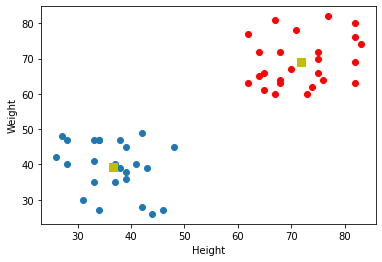

In [348]:
# An example with two-dimensional data, constructed to split into two clusters
X = np.random.randint(25,50,(25,2))  # 25 rows, 2 columns
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))                 # stack columns-on-columns (that is, concatenate the lists of rows)
Z = np.float32(Z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

ret,label,center=cv.kmeans(Z, k, None, criteria, attempts, flags)

# Put the data into 2 classes
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
# Display the data and their centroids
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

The next example illustrates reduction of number of distinct colours in an image via clustering in colour space.

In [350]:
img = cv.imread('samples/home.jpg')  # RGB, values uint8
Z = img.reshape((-1,3))
Z = np.float32(Z)
k = 8

ret,label,center=cv.kmeans(Z, k, None, criteria, attempts, flags)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))

cv.imshow('res',res)
cv.waitKey(0)
cv.destroyAllWindows()

<h3>Histogram of gradients</h3>

HOG is a feature-description routine. An image is decomposed into cells, and in each cell the intensity gradient is computed. A poll is conducted of the pixels in a cell, and a histogram of gradient directions is created, weighted by gradient magnitudes. This vector is the description associated to the cell. Dalal-Triggs (2005) introduced this descriptor while working on the problem of pedestrian detection for car drivers. They used HOG statistics as input to an ML model, with good results.

In [323]:
# Histogram of gradients : 

bin_n = 16

def hog(img):
    # Compute discrete gradient, of colour or intensity, at each point of the image
    # According to Wiki, Dalal-Triggs found best performance from 1D derivative mask, that is, convolution with the
    # kernel [-1,0,1] and its transpose, compared to Sobel derivatives. They also found pre-application of
    # Gaussian smoothing did not help.
    
    # For here and now, Sobel partial derivatives
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)   # first order in x
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)   # first order in y
    mag, ang = cv.cartToPolar(gx, gy)     # these all have the same shape as img
    
    # According to Wiki, Dalal-Triggs found best performance from unsigned gradients and 9 bins.
    
    # For here and now, signed gradients and 16 bins
    sectors = np.int32(bin_n*ang/(2*np.pi))
    
    # Wiki: Image is divided into cells, which "can either be rectangular or radial in shape."
    # Wiki: "for the vote weight... the gradient magnitude itself generally produces the best results."
    
    # For here and now, four cells total, quadrants of the image
    halfx = int(img.shape[0]/2)
    halfy = int(img.shape[1]/2)
    sector_cells = sectors[:halfx,:halfy], sectors[halfx:,:halfy], sectors[:halfx,halfy:], sectors[halfx:,halfy:]
    mag_cells = mag[:halfx,:halfy], mag[halfx:,:halfy], mag[:halfx,halfy:], mag[halfx:,halfy:]
    
    # np.bincount(array, weights, minBins) counts the number of each entry in the given 1D array of non-negative
    #   integer entries. Optional arguments weights (an array of the same length, fp entries) gives the count with
    #   weights for each array element; the output is an array, padded to length at least minBins
    hists = [np.bincount(s.ravel(), m.ravel(), bin_n) for s, m in zip(sector_cells, mag_cells)]
    
    # Wiki: "To account for changes in illumination and contrast, the gradient strengths must be locally normalized, 
    #   which requires grouping the cells together into larger, spatially connected blocks. The HOG descriptor is then 
    #   the concatenated vector of the components of the normalized cell histograms from all of the block regions.
    #   These blocks typically overlap, meaning that each cell contributes more than once to the final descriptor."
    # R-HOG uses rectangular blocks, C-HOG circular. 
    #  "Dalal-Triggs found best was four 8x8 pixels cells per block (16x16 pixels per block)... They found that some minor 
    #   improvement in performance could be gained by applying a Gaussian spatial window within each block before tabulating 
    #   histogram votes in order to weight pixels around the edge of the blocks less."
    
    # Dalal-Triggs considered four block normalisations: L2 norm, L2 norm with clipping and normalisation again, L1 norm,
    # and L1 norm followed by square root. In each case they add epsilon to the norms (presumably for numerical stability).
    # They found L1 norm "slightly less reliable" than the other three, but "all four methods showed very significant 
    # improvement" compared to using non-normalised blocks.
    
    # for 1D arrays, hstack concatenates.
    hist = np.hstack(hists)
    return hist
    # Wiki: "Dalal and Triggs used HOG descriptors as features in a support vector machine (SVM)" model.
    #   In other words, HOG was used as a feature-detector to train ML models to recognise humans (pedestrians, initially).
    #  "Dalal and Triggs compared their R-HOG and C-HOG descriptor blocks against generalized Haar wavelets, 
    #   PCA-SIFT descriptors, and shape context descriptors." They found HOG performed better than the other methods,
    #   in descending order, and that C-HOG may perform slightly better than R-HOG.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


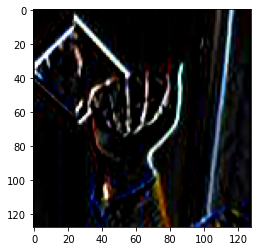

In [304]:
plt.imshow(gx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


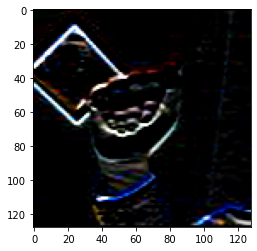

In [307]:
plt.imshow(gy)

<h2>Human detection in OpenCV</h2>

In [536]:
face_img = cv.imread("faces/test.jpg")
size = (face_img.shape[1], face_img.shape[0])
face_detector = cv.FaceDetectorYN.create("face_detection_yunet_2022mar.onnx", "", size)

In [537]:
faces = face_detector.detect(faceimg)

In [538]:
faces[1]

array([[294.16995 , 190.0192  ,  96.2008  , 122.163475, 325.7113  ,
        230.34015 , 368.92136 , 231.70064 , 349.13428 , 248.65823 ,
        324.9839  , 274.1484  , 362.1906  , 275.52136 ,   0.999967]],
      dtype=float32)

In [559]:
#https://github.com/opencv/opencv/blob/4.x/samples/dnn/face_detect.py
def visualizeFaces(input, faces, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            print('Face {}, top-left coordinates: ({:.0f}, {:.0f}), box width: {:.0f}, box height {:.0f}, score: {:.2f}'.format(idx, face[0], face[1], face[2], face[3], face[-1]))
            coords = face[:-1].astype(np.int32)
            cv.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv.circle(input, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv.circle(input, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv.circle(input, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv.circle(input, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv.circle(input, (coords[12], coords[13]), 2, (0, 255, 255), thickness)
    return None
    #cv.putText(input, 'FPS: {:.2f}'.format(fps), (1, 16), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [560]:
visualizeFaces(face_img, faces)

Face 0, top-left coordinates: (294, 190), box width: 96, box height 122, score: 1.00


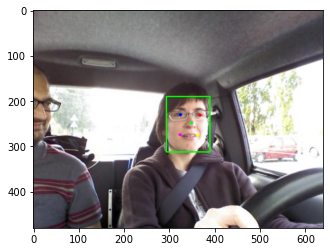

In [546]:
plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))

In [480]:
def visualizeHands(image, results, print_results=False, fps=None):
    output = image.copy()

    if fps is not None:
        cv.putText(output, 'FPS: {:.2f}'.format(fps), (0, 15), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    for idx, palm in enumerate(results):
        score = palm[-1]
        palm_box = palm[0:4]
        palm_landmarks = palm[4:-1].reshape(7, 2)

        # put score
        palm_box = palm_box.astype(np.int32)
        cv.putText(output, '{:.4f}'.format(score), (palm_box[0], palm_box[1]+12), cv.FONT_HERSHEY_DUPLEX, 0.5, (0, 255, 0))

        # draw box
        cv.rectangle(output, (palm_box[0], palm_box[1]), (palm_box[2], palm_box[3]), (0, 255, 0), 2)

        # draw points
        palm_landmarks = palm_landmarks.astype(np.int32)
        for p in palm_landmarks:
            cv.circle(output, p, 2, (0, 0, 255), 2)

        # Print results
        if print_results:
            print('-----------palm {}-----------'.format(idx + 1))
            print('score: {:.2f}'.format(score))
            print('palm box: {}'.format(palm_box))
            print('palm landmarks: ')
            for plm in palm_landmarks:
                print('\t{}'.format(plm))

    return output

In [ ]:
from mp_palmdet import MPPalmDet

In [482]:
backends = [cv.dnn.DNN_BACKEND_OPENCV, cv.dnn.DNN_BACKEND_CUDA, cv.dnn.DNN_BACKEND_TIMVX]
targets = [cv.dnn.DNN_TARGET_CPU, cv.dnn.DNN_TARGET_CUDA, cv.dnn.DNN_TARGET_CUDA_FP16, cv.dnn.DNN_TARGET_NPU]

model = MPPalmDet(modelPath="palm_detection_mediapipe_2022may.onnx")

In [497]:
# expects array of uint8
results = model.infer(newimg)
if len(results) == 0:
    print('Hand not detected')

In [524]:
warnings = []
filecount = 0
e1 = cv.getTickCount()      #cv counts processor cycles, could use python time module instead
for dir in Path("Dataset (ur-garg)").iterdir():
    for file in dir.iterdir():
        if file.suffix != ".jpg":
            continue
        filename = str(file)
        filecount += 1
        if not cv.haveImageReader(filename):
            print("Could not load: " + filename)
            continue
        image = cv.imread(filename)
        results = model.infer(image)
        if len(results) == 0:
            print('Hand not detected: ' + filename)
            warnings.append(file)
        #elif len(results) > 1:
        #    print('Extra hand detected: ' + filename)
        #    warnings.append(file)
        elif results[0][18] < 0.7:
            print('Low confidence hand: ' + filename + ", " + str(results[0][18]))
            warnings.append(file)

e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print("Elapsed time: " + str(time))
print("FPS: " + str(filecount/time))        

Low confidence hand: Dataset (ur-garg)\user_10\G3.jpg, 0.5513593789072551
Hand not detected: Dataset (ur-garg)\user_10\G8.jpg
Low confidence hand: Dataset (ur-garg)\user_10\G9.jpg, 0.6687435872655624
Low confidence hand: Dataset (ur-garg)\user_10\H8.jpg, 0.6831800885287374
Low confidence hand: Dataset (ur-garg)\user_10\K6.jpg, 0.5817799955177655
Low confidence hand: Dataset (ur-garg)\user_10\K8.jpg, 0.5959403200192472
Low confidence hand: Dataset (ur-garg)\user_10\P3.jpg, 0.6888063566934429
Low confidence hand: Dataset (ur-garg)\user_3\C6.jpg, 0.5722760957187389
Low confidence hand: Dataset (ur-garg)\user_3\F7.jpg, 0.6574916903647683
Hand not detected: Dataset (ur-garg)\user_3\K0.jpg
Hand not detected: Dataset (ur-garg)\user_4\K7.jpg
Hand not detected: Dataset (ur-garg)\user_4\P0.jpg
Low confidence hand: Dataset (ur-garg)\user_4\P1.jpg, 0.6363518165158824
Low confidence hand: Dataset (ur-garg)\user_4\P2.jpg, 0.5996671497060103
Low confidence hand: Dataset (ur-garg)\user_4\P3.jpg, 0.543

<h3>Optical flow: tracking features through video</h3>

Suppose an object's intensity varies little during a time <i>dt</i>, during which its position changes by <i>(dx, dy)</i>. The first-order Taylor expansion of the intensity relates the unknown displacements <i>dx</i> and <i>dy</i> in terms of the gradient of the intensity (in space and time) at the starting pixel, which can be calculated. From this much only the tangent direction is determined.

Lucas-Kanade tracks small (3x3) patches of pixels between frames (on the assumption that the pixels in the patches move together). The corresponding system is now overdetermined, so numerical methods are used to find a best fit. The method  cv.calcOpticalFlowPyrLK() does this calculation. (It also looks at other levels of the image pyramid to try to get some amount of scale-invariance.) 

See https://docs.opencv.org/4.6.0/d4/dee/tutorial_optical_flow.html.

In [576]:
# Illustration of optical flow for Shi-Tomasi corner points

cap = cv.VideoCapture("samples/vtest.avi")
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv.add(frame, mask)
    cv.imshow('frame', img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv.destroyAllWindows()

The code here does not check the goodness of match between keypoint sets of consecutive frames. Consequently in this visualisation one sometimes sees keypoints jumping to nearby objects. "For robust tracking, corner points should be detected in particular intervals." The next script "finds the feature points at every 5 frames. It also runs a backward-check of the optical flow points to select only good ones."

In [589]:
# OpenCV samples/lk_track.py

#from common import draw_str

lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

track_len = 10
detect_interval = 5
tracks = []
cam = cv.VideoCapture("samples/vtest.avi")
frame_idx = 0

while True:
    _ret, frame = cam.read()
    if not _ret:
        print("No frame returned.")
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    vis = frame.copy()

    if len(tracks) > 0:
        img0, img1 = prev_gray, frame_gray
        p0 = np.float32([tr[-1] for tr in tracks]).reshape(-1, 1, 2)
        p1, _st, _err = cv.calcOpticalFlowPyrLK(img0, img1, p0, None, **lk_params)
        p0r, _st, _err = cv.calcOpticalFlowPyrLK(img1, img0, p1, None, **lk_params)
        d = abs(p0-p0r).reshape(-1, 2).max(-1)
        good = d < 1
        new_tracks = []
        for tr, (x, y), good_flag in zip(tracks, p1.reshape(-1, 2), good):
            if not good_flag:
                continue
            tr.append((x, y))
            if len(tr) > track_len:
                del tr[0]
            new_tracks.append(tr)
            cv.circle(vis, (int(x), int(y)), 2, (0, 255, 0), -1)
        tracks = new_tracks
        cv.polylines(vis, [np.int32(tr) for tr in tracks], False, (0, 255, 0))
        #draw_str(vis, (20, 20), 'track count: %d' % len(self.tracks))

    if frame_idx % detect_interval == 0:
        mask = np.zeros_like(frame_gray)
        mask[:] = 255
        for x, y in [np.int32(tr[-1]) for tr in tracks]:
            cv.circle(mask, (x, y), 5, 0, -1)
        p = cv.goodFeaturesToTrack(frame_gray, mask = mask, **feature_params)
        if p is not None:
            for x, y in np.float32(p).reshape(-1, 2):
                tracks.append([(x, y)])

    frame_idx += 1
    prev_gray = frame_gray
    cv.imshow('lk_track', vis)

    ch = cv.waitKey(1)
    if ch == 27:
        break
                
cv.destroyAllWindows()

No frame returned.


Farneback ("Two-Frame Motion Estimation Based on Polynomial Expansion," 2003) gave an algorithm to compute optical flow over the entire image (rather than selected keypoints).

In [578]:
# Farneback's dense optical flow

cap = cv.VideoCapture("samples/vtest.avi")
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while True:
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    cv.imshow('frame2', bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    prvs = next
cv.destroyAllWindows()

Meanshift is another tracking method implemented in OpenCV. See https://docs.opencv.org/4.6.0/d7/d00/tutorial_meanshift.html.

In [618]:
# batch test of Shi-Tomasi on uncropped images

maxCorners = 50
qualityLevel = 0.2

filecount = 0
e1 = cv.getTickCount()      #cv counts processor cycles, could use python time module instead
for dir in Path("Dataset (ur-garg)").iterdir():
    #Path("temp/" + dir.stem).mkdir()
    for file in dir.iterdir():
        if file.suffix != ".jpg":
            continue
        filepath = str(file)
        filecount += 1
        if not cv.haveImageReader(filepath):
            print("Could not load: " + filepath)
            continue
        image = cv.imread(filepath, flags=0)
        minDistance = int(image.shape[0]*0.02)
        corners = cv.goodFeaturesToTrack(image,maxCorners,qualityLevel,minDistance)
        corners = np.int0(corners)   
        for i in corners:
            x,y = i.ravel()
            cv.circle(image,(x,y),3,0,-1)
        cv.imwrite("temp/"+ dir.stem +"/"+ file.name, image)
        #print("temp/"+ dir.stem +"/"+ file.name)
        
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print("Elapsed time: " + str(time))
print("FPS: " + str(filecount/time)) 

Elapsed time: 5.2331744
FPS: 321.0288577426351


<h2>Mediapipe by Google</h2>

Getting started: https://google.github.io/mediapipe/getting_started/python.html
Handmark: https://google.github.io/mediapipe/solutions/hands

In [1]:
import mediapipe as mp

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [14]:
IMAGE_FILES = ["temp/G6.jpg"]
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

e1 = cv.getTickCount()      #cv counts processor cycles, could use python time module instead
filecount = 0

#for idx, file in enumerate(IMAGE_FILES):
for dir in Path("Dataset (ur-garg)").iterdir():
    #Path("temp/" + dir.stem).mkdir()
    for file in dir.iterdir():
        if file.suffix != ".jpg":
            continue
        filepath = str(file)
        if not cv.haveImageReader(filepath):
            print("Could not load: " + filepath)
            continue
        filecount += 1
        # in determining handedness, mpHands by default expects the image is mirrored, as in a selfie in a mirror
        image = cv.flip(cv.imread(filepath), 1)                       # flip to correct for this in normal photos
        results = hands.process(cv.cvtColor(image, cv.COLOR_BGR2RGB)) # likewise mpHands expects RGB but opencv2 uses BGR

        # Print handedness and draw hand landmarks on the image.
        #print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            print("Hand not detected: " + filepath)
            continue
        image_height, image_width, _ = image.shape
        for hand_landmarks in results.multi_hand_landmarks:
            #print('hand_landmarks:', hand_landmarks)
            #print(
            #  f'Index finger tip coordinates: (',
            #  f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
            #  f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            #)
            mp_drawing.draw_landmarks(
              image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
        cv.imwrite("temp/"+ dir.stem +"/"+ file.name, image)
        # Draw hand world landmarks.
        #if not results.multi_hand_world_landmarks:
        #    continue
        #for hand_world_landmarks in results.multi_hand_world_landmarks:
        #    mp_drawing.plot_landmarks(
        #      hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
        
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print("Elapsed time: " + str(time))
print("FPS: " + str(filecount/time)) 

Hand not detected: Dataset (ur-garg)\user_10\C1.jpg
Elapsed time: 79.255611
FPS: 21.197237379193254
